--- In this example we look at aperture photometry.

In [1]:
import numpy as np
from astropy.io import fits

In [2]:
image_dir = 'data' # define image directory relative to this script

In [3]:
f = 'f277w' # filter

In [4]:
sci = fits.getdata(f'{image_dir}/{f}_sci.fits') # read science FITS file data into numpy array
wht = fits.getdata(f'{image_dir}/{f}_wht.fits') # read weight FITS file data into numpy array

--- cut out a portion of the image for analysis

In [5]:
x = 800 # pixel x-centre of cutout, must be an integer
y = 800 # pixel y-centre of cutout, must be an integer
r = 100 # width/2 of cutout, must be int

In [6]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [7]:
noise = 1./np.sqrt(wht) # conversion from weight to noise
sig = sci/noise # signifance map

--- now run segmentation on the image to detect sources.

In [8]:
from photutils import detect_sources

In [9]:
threshold = 5 # require each pixel have a significance of >2.5 (since we're using the significance image)
npixels = 5 # require at least 5 connected pixels

In [10]:
segm = detect_sources(sig, threshold, npixels=npixels) # make segmentation image

--- get various properties of the sources, crucially inclusing their centres

In [11]:
from photutils import SourceCatalog, CircularAperture

In [12]:
cat = SourceCatalog(sci, segm)

--- get a list of positions (x,y) of the sources

In [13]:
positions = []
for obj in cat:
    positions.append(np.transpose((obj.xcentroid, obj.ycentroid)))

--- make a CircularAperture object. This can be plotted but is mostly used for the aperture photometry.

In [14]:
r = 5. # radius of aperture in pixels
apertures = CircularAperture(positions, r)

--- let's make a plot of the sources and the apertures

In [15]:
import matplotlib.pyplot as plt

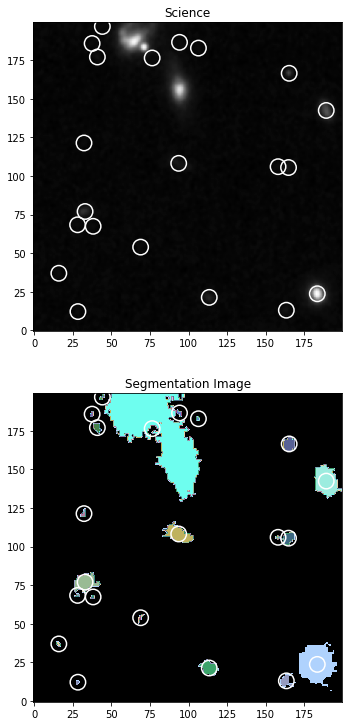

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(sci, origin='lower', cmap='Greys_r')
ax1.set_title('Science')
cmap = segm.make_cmap()
ax2.imshow(segm, origin='lower', cmap=cmap)
ax2.set_title('Segmentation Image')
for aperture in apertures:
    aperture.plot(axes=ax1, color='white', lw=1.5)
    aperture.plot(axes=ax2, color='white', lw=1.5)
plt.show()

--- now let's do some photometry

In [17]:
from photutils import aperture_photometry

In [18]:
phot_table = aperture_photometry(sci, apertures)
phot_table['aperture_sum'].info.format = '%.3f'  # for consistent table output
print(phot_table)

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1 183.38452334352743  23.71773976327746       10.911
  2 163.33398749374604 13.061356969607502        0.459
  3 28.378837629823987 12.181289479808457        0.072
  4  113.4239382655442 21.377916501591166        0.917
  5  16.01675170212543  36.99209709929613        0.111
  6  68.98313438089053   53.9279312771933        0.144
  7 38.229779964105425  67.40048777112492        0.134
  8  28.15540287156708  68.38505894776995        0.204
  9 33.016656723378865  76.98716835678286        1.526
 10 164.74954595750572 105.45147993595373        0.458
 11   93.6347029265019 108.16742959865554        0.875
 12 157.98477942994643 106.01147175669612        0.164
 13 32.315461436798415 121.35117196969698        0.152
 14  76.45650067514568 176.39704746384632        0.576
 15 189.16995775357347 142.41144687604404        3.288
 16 165.17